# **Image Processing With Neural Networks**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [2]:
def show_comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,12), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

## **Introducing convolutional neural networks**

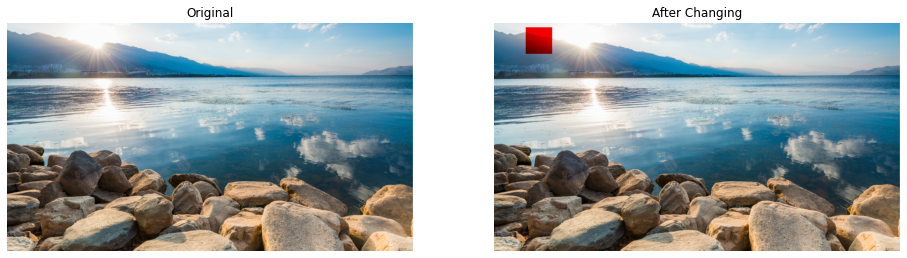

In [3]:
water = plt.imread("water.jpg")
missing_water = water.copy()

# missing_water[25:150,150:275,0] = 0            # red
missing_water[25:150,150:275,1] = 0            # green
missing_water[25:150,150:275,2] = 0            # blue

show_comparison(water, "Original", missing_water, "After Changing")

If we remove blue and green values, then the image will become red.

## **Classifying images**

In [4]:
n_categories = 3
labels = ["shirt","dress", "shoe","dress", "shoe","shirt","shirt", "dress"]
categories = np.array(["shirt", "dress", "shoe"])

ohe_labels = np.zeros((len(labels), n_categories)) 
print(ohe_labels)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Initializing ohe_labels as all zeros

In [5]:
for ii in range(len(labels)):
    jj = np.where(categories == labels[ii])
    ohe_labels[ii,jj] = 1  

print(ohe_labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


Finding the location of this label in the categories variable and setting the corresponding zero to one.

In [6]:
test_labels = [[1, 0, 0],
              [0, 1, 0],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [1, 0, 0],
              [0, 1, 0]]

Defining test labes.

In [7]:
correct_predictions = (test_labels*ohe_labels).sum()
print(correct_predictions)

7.0


Calculation the number of correct predictions

In [8]:
ratio = correct_predictions/len(labels)
print(ratio)

0.875


Calculation the ratio of correct predictions.

## **Classification with Keras**

### **Construct a neural network**

In [9]:
model = Sequential()

Initializing a sequential model.

In [10]:
model.add(Dense(10, activation='relu', input_shape=(784,1)))  # 28x28 pixels of the image

The first layer.

In [11]:
model.add(Dense(10, activation = 'relu'))

The second layer.

In [12]:
model.add(Dense(3, activation = 'softmax'))

The output layer has one unit for each 3 categories. 

### **Compilation a neural network**

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### **Fitting a neural network model to clothing data**

In [ ]:
train_data = train_data.reshape(50, 784)

Reshaping the data to two-dimensional array.

In [ ]:
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Fitting the model.

### **Cross-validation for neural network evaluation**

In [ ]:
test_data = test_data.reshape(10, 784)


Reshape test data for evatuation.

In [ ]:
model.evaluate(test_data, test_labels)

Evaluating the model.